# LOADING DEPENDENCIES

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
import pandas as pd

df = pd.read_table('train_data.txt', header=None, names=['plotsummary', 'genre'])

df['plotsummary'] = df['plotsummary'].str.replace(':::', '')

df.to_csv('cleaned_train_data.txt', index=False, sep='\t') #

In [50]:
df.head(10)

,plotsummary,genre
0,1 Oscar et la dame rose (2009) drama Listen...,NaN
1,2 Cupid (1997) thriller A brother and siste...,NaN
2,"3 Young, Wild and Wonderful (1980) adult As...",NaN
3,4 The Secret Sin (1915) drama To help their...,NaN
4,5 The Unrecovered (2007) drama The film's t...,NaN
5,6 Quality Control (2011) documentary Qualit...,NaN
6,"7 ""Pink Slip"" (2009) comedy In tough econom...",NaN
7,8 One Step Away (1985) crime Ron Petrie (Ke...,NaN
8,"9 ""Desperate Hours"" (2016) reality-tv A sud...",NaN
9,10 Spirits (2014/I) horror Four high school...,NaN


# DATA PREPROCESSING

In [51]:
df.shape

(54214, 2)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   plotsummary  54214 non-null  object 
 1   genre        0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 847.2+ KB


In [53]:
df.tail()

,plotsummary,genre
54209,"54210 ""Bonino"" (1953) comedy This short-liv...",NaN
54210,54211 Dead Girls Don't Cry (????) horror Th...,NaN
54211,54212 Ronald Goedemondt: Ze bestaan echt (200...,NaN
54212,54213 Make Your Own Bed (1944) comedy Walte...,NaN
54213,54214 Nature's Fury: Storm of the Century (20...,NaN


In [54]:
df.describe()

,genre
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [117]:
# EAD

In [56]:
df['genre'].unique()

array([nan])

In [57]:
df['plotsummary'].unique()

array(['1  Oscar et la dame rose (2009)  drama  Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.',
       '2  Cupid (1997)  thriller  A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.',
       '3  Young, Wild and Wonderful (1980)  adult  As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the 

In [58]:
df.isnull().sum()

plotsummary        0
genre          54214
dtype: int64

In [59]:
missing_genres = df['genre'].isna().sum()
total_movies = len(df)
print(f"Missing genres: {missing_genres}")
print(f"Total movies: {total_movies}")
print(f"Percentage of missing genres: {missing_genres / total_movies * 100:.2f}%")


Missing genres: 54214
Total movies: 54214
Percentage of missing genres: 100.00%


In [60]:
df['genre'].fillna('', inplace=True)

In [61]:
df.isnull().sum()

plotsummary    0
genre          0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [119]:
# Convert 'genre' and 'plotsummary' columns to string type before using .str
df['genre'] = df['genre'].astype(str)
df['plotsummary'] = df['plotsummary'].astype(str)

# RemovING unwanted characters and symbols
df['genre'] = df['genre'].str.replace(':::', '')
df['plotsummary'] = df['plotsummary'].str.replace(':::', '')

In [120]:
# Normalizing text
df['plotsummary'] = df['plotsummary'].str.lower()

In [121]:
# Feature extraction
features = df[['plotsummary', 'genre']]  # Replace with actual features
labels = df['genre']

In [122]:
!pip install nltk

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))  # Define stop_words here

def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    words = text.split()  # Split text into words
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic characters
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

df['plotsummary'] = df['plotsummary'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df.head()

,plotsummary,genre
0,oscar et la dame rose drama listening conversa...,
1,cupid thriller brother sister past incestuous ...,
2,wild wonderful adult bus empties students fiel...,
3,secret sin drama help unemployed father make e...,
4,unrecovered drama title refers bodies ground a...,


In [23]:
# one-hot encoding)

In [67]:
# Encoding the genre labels
from sklearn.preprocessing import MultiLabelBinarizer # Import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
labels_encoded = mlb.fit_transform(labels)

In [73]:
df.head()

,plotsummary,genre
0,oscar et la dame rose drama listening conversa...,
1,cupid thriller brother sister past incestuous ...,
2,wild wonderful adult bus empties students fiel...,
3,secret sin drama help unemployed father make e...,
4,unrecovered drama title refers bodies ground a...,


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   plotsummary  54214 non-null  object
 1   genre        54214 non-null  object
dtypes: object(2)
memory usage: 847.2+ KB


In [34]:
df.head(10)

,plotsummary,genre,genre_
0,oscar et la dame rose drama listening conversa...,[],1
1,cupid thriller brother sister past incestuous ...,[],1
2,wild wonderful adult bus empties students fiel...,[],1
3,secret sin drama help unemployed father make e...,[],1
4,unrecovered drama title refers bodies ground a...,[],1
5,quality control documentary quality control co...,[],1
6,comedy tough economic times max joey run ideas...,[],1
7,one step away crime ron petrie troubled teen w...,[],1
8,sudden calamitous causing great loss like airp...,[],1
9,spirits horror four high school students embar...,[],1


In [79]:
# Convert features to numerical representations
from sklearn.preprocessing import OneHotEncoder

# Assuming 'features' is a Pandas DataFrame
encoder = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# ... rest of your code


In [88]:
# Assuming 'df' is your original DataFrame
# Split the dataset into training and testing sets BEFORE encoding
from sklearn.model_selection import train_test_split

X = df.drop('genre', axis=1)  # Replace 'genre' with the actual name of your target column
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now encode the features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Fit the model
model.fit(X_train_encoded, y_train)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_encoded: (43371, 43336)
Shape of y_train: (43371,)


In [89]:
# Convert features to numerical representations
from sklearn.preprocessing import OneHotEncoder

# Assuming 'features' is a Pandas DataFrame
encoder = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Fit the model to the training data
model.fit(X_train_encoded, y_train) # Add this line to fit the model

# Predictions and evaluation using the encoded data
y_pred = model.predict(X_test_encoded) # Use the encoded test data
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [93]:
# Assuming X_test_encoded and y_test are your test data
score = model.score(X_test_encoded, y_test)
print(score)

1.0


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

                   1.00      1.00      1.00     10843

    accuracy                           1.00     10843
   macro avg       1.00      1.00      1.00     10843
weighted avg       1.00      1.00      1.00     10843



In [95]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
import numpy as np

# Use the encoded features instead of the original 'X'
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='accuracy')  # Use X_train_encoded

print("Cross-Validation Accuracy Scores: ", cv_scores)
print("Mean CV Accuracy: ", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy: ", np.std(cv_scores))

Cross-Validation Accuracy Scores:  [1. 1. 1. 1. 1.]
Mean CV Accuracy:  1.0
Standard Deviation of CV Accuracy:  0.0


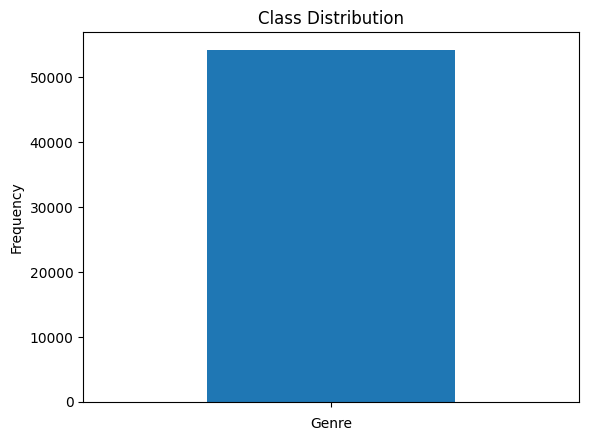

In [101]:
import matplotlib.pyplot as plt

# Plot the distribution of classes
y.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()


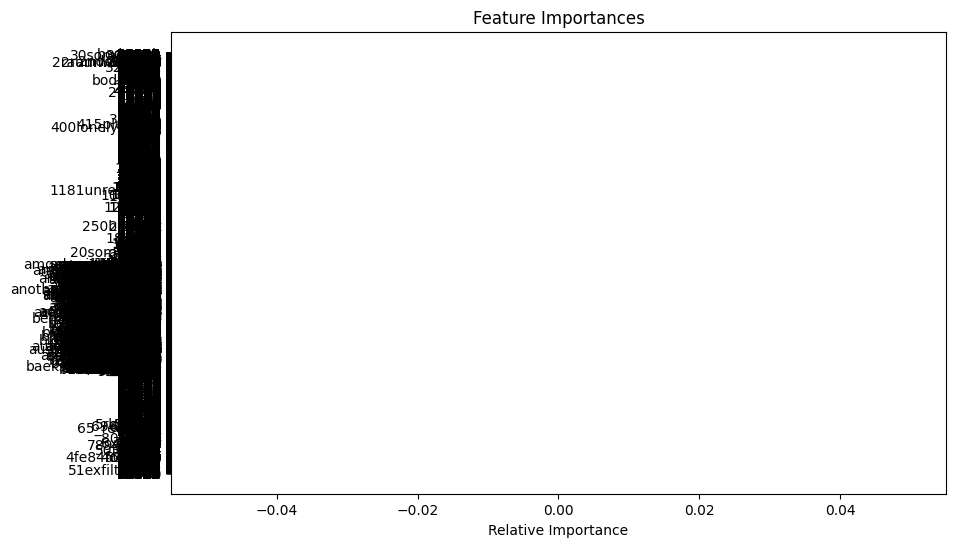

In [109]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

# For tree-based models like RandomForest, use feature_importances_
feature_importances = model.feature_importances_

# Create an instance of CountVectorizer or TfidfVectorizer and fit it to your data
vectorizer = CountVectorizer()  # Initialize CountVectorizer
vectorizer.fit(X_train['plotsummary'])  # Fit the vectorizer to your training data, focusing on the 'plotsummary' column

# Get feature names, accounting for both 'plotsummary' and 'genre' columns
features = np.concatenate((vectorizer.get_feature_names_out(), ['genre']))

indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) # Now 'features' has the correct size
plt.xlabel('Relative Importance')
plt.show()

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Assuming 'X' contains your text data and 'y' your labels
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X['plotsummary'])  # Transform the 'plotsummary' column of X

# Example for a RandomForest classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_transformed, y)  # Fit on the transformed data

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  1.0
